# Research Paper classification 

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
print("Number of rows and colums in training data are",train.shape)
print("Number of rows and colums in testing data are",test.shape)

Number of rows and colums in training data are (20972, 9)
Number of rows and colums in testing data are (8989, 3)


In [3]:
train.isnull().sum()
test.isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [4]:
train.head(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0


checking if the problem given is multilabel classification or not

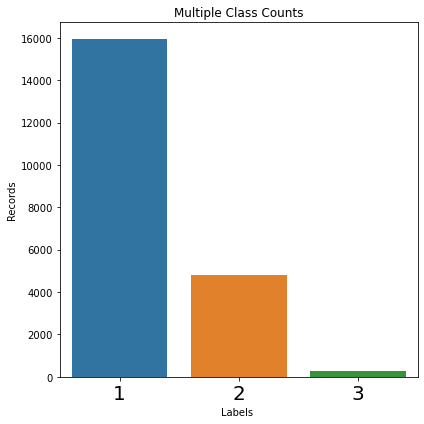

In [5]:
x=train.iloc[:,2:].sum(axis=1).value_counts()
#plot
plt.figure(figsize=(6,6))
sns.barplot(x=x.index, y=x.values)
plt.title("Multiple Class Counts")
plt.ylabel('Records')
plt.xlabel('Labels ')
plt.xticks(size = 20)
plt.tight_layout() 
plt.show()

In [6]:
text_train=train['TITLE']+train['ABSTRACT']
text_test=test['TITLE']+test['ABSTRACT']
text=pd.concat([text_train,text_test])

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\purus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\purus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Preprocessing Data

In [7]:
text

0       Reconstructing Subject-Specific Effect Maps  P...
1       Rotation Invariance Neural Network  Rotation i...
2       Spherical polyharmonics and Poisson kernels fo...
3       A finite element approximation for the stochas...
4       Comparative study of Discrete Wavelet Transfor...
                              ...                        
8984    Supporting mixed-datatype matrix multiplicatio...
8985    An axiomatic basis for Blackwell optimality  I...
8986    GeneVis - An interactive visualization tool fo...
8987    Quantifying the causal effect of speed cameras...
8988    Cube-magic labelings of grids  We show that th...
Length: 29961, dtype: object

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered = text.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

filtered = filtered.apply(lambda x: ' '.join(
    term.lower() for term in x.split() if term.isalpha()))

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

filtered=filtered.apply(lambda x: ' '.join(
    wordnet_lemmatizer.lemmatize(term) for term in x.split()))

filtered = filtered.apply(lambda x: ' '.join(
    nltk.PorterStemmer().stem(term) for term in x.split()))

In [9]:
filtered

0       reconstruct effect map predict model allow inf...
1       rotat invari neural network rotat invari trans...
2       spheric polyharmon poisson kernel polyharmon f...
3       a finit element approxim stochast system the s...
4       compar studi discret wavelet transform wavelet...
                              ...                        
8984    support matrix multipl within bli framework we...
8985    an axiomat basi blackwel optim in theori marko...
8986    genevi an interact visual tool combin dataset ...
8987    quantifi causal effect speed camera road traff...
8988    label grid we show vertex edg grid graph label...
Length: 29961, dtype: object

In [10]:
filtered_train=filtered[:20972]
filtered_test=filtered[20972:]

In [11]:
filtered_train

0        reconstruct effect map predict model allow inf...
1        rotat invari neural network rotat invari trans...
2        spheric polyharmon poisson kernel polyharmon f...
3        a finit element approxim stochast system the s...
4        compar studi discret wavelet transform wavelet...
                               ...                        
20967    contemporari machin guid practition physic sci...
20968    uniform diamond coat hard alloy cut insert dep...
20969    analys soccer game cluster conceptor we presen...
20970    on effici simul sum correl variat the sum vari...
20971    whi option stop problem bayesian option stop s...
Length: 20972, dtype: object

Pre-modelling steps

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filtered_train, train.iloc[:, 3:], test_size=0.2, random_state=6, shuffle=True)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=1, smooth_idf=True, tokenizer=lambda x: x.split(),sublinear_tf=True, ngram_range=(1,3))

X_TRAIN=vectorizer.fit_transform(x_train)
X_TEST=vectorizer.transform(x_test)

In [14]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(X_TRAIN)
tsne_features[1:4,:]

array([[ -1.410911  , -10.3968525 ],
       [  5.924734  , -11.966511  ],
       [  0.84703207,   3.039516  ]], dtype=float32)

<AxesSubplot:>

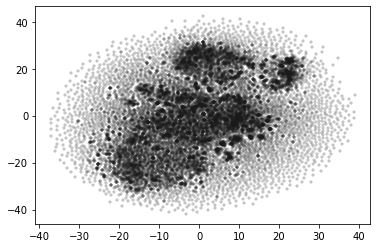

In [36]:
sns.scatterplot(x=tsne_features[:,0],y=tsne_features[:,1], s=10, color=".10", marker="+",data=X_TRAIN)

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


clf=OneVsRestClassifier(LogisticRegression()).fit(X_TRAIN,y_train)
predictions=clf.predict(X_TEST)
print( "Fscore and accuracy for OnevsRest LR", f1_score(y_test,predictions, average='micro'), "and", accuracy_score(y_test,predictions))

Fscore and accuracy for OnevsRest LR 0.7993791230112534 and 0.6231227651966627


In [17]:
test_multilabel=vectorizer.transform(filtered_test)
predictions3=clf.predict(test_multilabel)

In [18]:
predictions3

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [38]:
from sklearn.metrics import multilabel_confusion_matrix
cm=multilabel_confusion_matrix(y_test,predictions)
cm

array([[[2055,  466],
        [ 169, 1505]],

       [[2931,   65],
        [ 267,  932]],

       [[2971,   94],
        [ 321,  809]],

       [[2806,  321],
        [ 194,  874]],

       [[4075,    0],
        [ 120,    0]],

       [[4144,    0],
        [  51,    0]]], dtype=int64)

In [20]:
Categories=pd.DataFrame(predictions, columns=['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance'])
test=pd.concat([test['ID'],Categories],axis=1)
test.to_csv("result.csv",index=False)
test.head(5)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0.0,1.0,0.0,0.0,0.0,0.0
1,20974,1.0,0.0,0.0,1.0,0.0,0.0
2,20975,0.0,0.0,0.0,0.0,0.0,0.0
3,20976,0.0,1.0,0.0,0.0,0.0,0.0
4,20977,1.0,0.0,1.0,0.0,0.0,0.0
